**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial para Robótica Móvel – CT-213**

**Professores:** 

Marcos Ricardo Omena de Albuquerque Maximo

André Oliveira Françani

**Alunos:**

Francisco Arthur Bonfim Azevedo - arthurazevedo41@gmail.com

Guilherme Pinheiro Cordeiro Leão - guipcleao@gmail.com

The latest version of this project is available at https://github.com/GuiPCLeao/SS-Curved-Kick (ask permission to guipcleao@gmail.com)

In [86]:
# Cleaning all saved variables:
%reset_selective -f "^a$"

In [87]:
import zipfile
import os

# download training dataset from google drive:
!gdown --id 1co2vKVTjX5i5SsybNpqKuGWFMWd0_xWX

with zipfile.ZipFile("TreinaPosicGeneva.zip","r") as zip_ref:
  zip_ref.extractall() # extracts in current directory

# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results') 
os.remove("TreinaPosicGeneva.zip")

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1co2vKVTjX5i5SsybNpqKuGWFMWd0_xWX
To: /content/TreinaPosicGeneva.zip
100% 702k/702k [00:00<00:00, 96.1MB/s]


In [88]:
print('AVAILABLE DATASET FILES:')
data = []
for filename in os.listdir('.'):
  if filename.endswith("csv"): 
    # Your code comes here such as 
    print(filename)
    data.append(filename)

AVAILABLE DATASET FILES:
LargeNoCutOutTol06.csv
LargeNoCutOutTol03.csv
SmallCutOutTol06.csv
LargeCutOutTol06.csv
SmallNoCutOutTol06.csv
LargeCutOutTol03.csv


In [89]:
import pandas as pd

colnames = ['linear_vel', 'angular_vel', 'angle', 'target', 'ranking']
df = pd.read_csv('LargeNoCutOutTol06.csv', header=None, names=colnames)

training_df = df.sample(frac=0.8,random_state=200) 
validation_df = df.drop(training_df.index)

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, losses, optimizers, activations, metrics, regularizers, utils
import os
import math

class SSAgent:
  """
  Represents a Deep Q-Networks (DQN) SS agent.
  """
  def __init__(self, training_df, validation_df, num_epochs=5000, batch_size=50, lambda_l2=0.0, learning_rate=0.001):
    """
    Creates a Deep Q-Networks (DQN) SS agent.

    :param training_df: dataset used for training the neural network.
    :type training_df: pandas.DataFrame.
    :param validation_df: dataset used for validating the neural network.
    :type validation_df: pandas.DataFrame.
    :param num_epochs: number of training epochs.
    :type num_epochs: int.
    :param batch_size: size of the mini-batches used during training.
    :type batch_size: int.
    :param lambda_l2: lambda parameter of the L2 regularization.
    :type lambda_l2: float.
    :param learning_rate: learning rate of the action-value neural network.
    :type learning_rate: float.
    """
    self.features_names = ['target', 'ranking']
    self.output_names = ['linear_vel', 'angular_vel', 'angle']
    self.lambda_l2 = lambda_l2
    self.num_epochs = num_epochs
    self.training_input = training_df.loc[:,self.features_names]
    self.expected_output = training_df.loc[:,self.output_names]
    self.validation_input = validation_df.loc[:,self.features_names]
    self.validation_output = validation_df.loc[:,self.output_names]
    self.input_size = self.training_input.shape[1]
    self.output_size = self.expected_output.shape[1]
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.model = self._make_model()

  def _make_model(self):
    """
    Makes the neural network model using Keras.

    :return: sequential neural network.
    :rtype: Keras' model.
    """
    model = models.Sequential()

    # LAYER 1:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 75
    model.add(layers.Dense(number_of_neurons,
                           name='1_dense_' + str(number_of_neurons) + '_leaky_relu',
                           input_dim=self.input_size,
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 2:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 30
    model.add(layers.Dense(number_of_neurons,
                           name='2_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 3:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 40
    model.add(layers.Dense(number_of_neurons,
                           name='3_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 4:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 50
    model.add(layers.Dense(number_of_neurons,
                           name='4_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 5:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 40
    model.add(layers.Dense(number_of_neurons,
                           name='5_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 6:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 30
    model.add(layers.Dense(number_of_neurons,
                           name='6_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 7:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 20
    model.add(layers.Dense(number_of_neurons,
                           name='7_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 8:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 20
    model.add(layers.Dense(number_of_neurons,
                           name='8_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    # LAYER 9:
    activation_function = layers.LeakyReLU(alpha=0.01)
    number_of_neurons = 20
    model.add(layers.Dense(number_of_neurons,
                           name='9_dense_' + str(number_of_neurons) + '_leaky_relu',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))

    # LAYER 10:
    activation_function = activations.linear
    number_of_neurons = self.output_size
    model.add(layers.Dense(number_of_neurons,
                           name='10_dense_' + str(number_of_neurons) + '_linear',
                           activation=activation_function,
                           use_bias=True,
                           kernel_regularizer=regularizers.l2(self.lambda_l2)))
    
    model.compile(loss=losses.mse,
                  optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                  metrics=['accuracy'])
    model.summary()
    return model

  def train(self):
    """
    Train the keras model and saves training and validation history.
    """
    self.history = self.model.fit(self.training_input,
                                  self.expected_output,
                                  validation_data=(self.validation_input,self.validation_output),
                                  batch_size=self.batch_size,
                                  epochs=self.num_epochs)

  def show_results(self):
    """
    Plot the training and validation loss history and saves it to results folder.
    """
    fig_format = 'png'

    # Plotting cost function convergence
    plt.plot(self.history.history['loss'], label='Train')
    plt.plot(self.history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.grid()
    plt.legend()
    plt.savefig('results/convergence.' + fig_format, format=fig_format)

  def save(self):
    """
    Saves the trained model and model's weights to results folder.
    """
    self.model.save_weights("results/weights.h5")
    self.model.save("results/model.h5")
    utils.plot_model(self.model,
                     to_file='results/model_plot.png',
                     show_shapes=True,
                     show_layer_names=True)



In [91]:
# Comment this line to enable training using your GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

num_epochs = 100  # number of epochs for training
batch_size = 50
#batch_size = int(training_df.shape[0] / 4)
lambda_l2 = 0.002 # reduce overfitting
learning_rate = 0.001


ss_agent = SSAgent(training_df, validation_df, num_epochs, batch_size, lambda_l2, learning_rate)
ss_agent.train()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1_dense_75_leaky_relu (Dens  (None, 75)               225       
 e)                                                              
                                                                 
 2_dense_30_leaky_relu (Dens  (None, 30)               2280      
 e)                                                              
                                                                 
 3_dense_40_leaky_relu (Dens  (None, 40)               1240      
 e)                                                              
                                                                 
 4_dense_50_leaky_relu (Dens  (None, 50)               2050      
 e)                                                              
                                                                 
 5_dense_40_leaky_relu (Dens  (None, 40)              

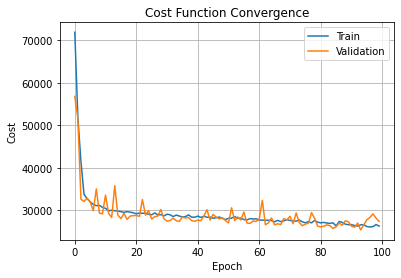

In [92]:
ss_agent.show_results()

In [93]:
expected_output = validation_df.loc[:,['linear_vel', 'angular_vel', 'angle']]
validation_inputs = validation_df.loc[:,['target', 'ranking']]

test_metrics = ss_agent.model.evaluate(validation_inputs, expected_output)
print('Test loss:', test_metrics[0])
print('Test accuracy:', test_metrics[1])

229/229 [==============================] - 0s 2ms/step - loss: 27414.1465 - accuracy: 1.0000
Test loss: 27414.146484375
Test accuracy: 1.0


In [94]:
from google.colab import files
import os
ss_agent.save()
os.system('zip -r results.zip results')
files.download("results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>